## Taller de evaluación materia ST1800 Almacenamiento y Recuperación de Información (2019-1)
## Estudiante: Mateo Graciano Londoño
## profesor: Edwin Montoya - emontoya@eafit.edu.co
## evaluación: se entrega el taller resuelto tanto en código, resultados y análisis



# Punto 1

In [1]:
# codigo python aca que responda estas preguntas
import pandas as pd
# 1.1 cargue el archivo en dataframes Pandas Python
data=pd.read_csv('articles.csv')
# 1.2 imprima el encabezado y los primeros registros
data.head()

,identifier,title,description,subject,creator
0,http://arxiv.org/abs/0704.3504,Smooth R\'enyi Entropy of Ergodic Quantum Info...,We prove that the average smooth Renyi entro...,Quantum Physics ; Computer Science - Informati...,"Schoenmakers, Berry ; Tjoelker, Jilles ; Tuyls..."
1,http://arxiv.org/abs/0706.1402,Analyzing Design Process and Experiments on th...,"In the field of tutoring systems, investigat...",Computer Science - Computers and Society ; Com...,"Brust, Matthias R. ; Rothkugel, Steffen ;"
2,http://arxiv.org/abs/0710.0736,Colour image segmentation by the vector-valued...,We propose a new method for the numerical so...,Computer Science - Computer Vision and Pattern...,"Kay, David A ; Tomasi, Alessandro ;"
3,http://arxiv.org/abs/0803.2570,Unequal Error Protection: An Information Theor...,An information theoretic framework for unequ...,Computer Science - Information Theory ; Comput...,"Borade, Shashi ; Nakiboglu, Baris ; Zheng, Liz..."
4,http://arxiv.org/abs/0808.0084,On the hitting times of quantum versus random ...,In this paper we define new Monte Carlo type...,Quantum Physics ; Computer Science - Data Stru...,"Magniez, Frederic ; Nayak, Ashwin ; Richter, P..."


In [2]:
# 1.3 cuantas columnas hay?
data.shape[1]

5

In [3]:
# 1.4 cuales son candidatas a ser seleccionadas para un procesamiento de texto para Búsqueda y Recuperación?
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
identifier     980 non-null object
title          980 non-null object
description    980 non-null object
subject        980 non-null object
creator        980 non-null object
dtypes: object(5)
memory usage: 38.4+ KB


   - title 
   - description
   - subject

## Punto 2

### 2.1 realice la selección de 2 columnas sobre las cuales desea trabajar.

- Columna 1: description
- Columna 2: subject

La explicación es que sin duda alguna la columna con más información es 'description'. Pero nos podemos aprovechar de que estamos usando metadatos para hacer un analisis exploratorio de los temas para saber cuales son los principales tema del dataset.

### 2.2 Para realizar el procesamiento, como plantearía trabajar con las 2 columnas?
  de forma independiente 

In [4]:
# como primera etapa del procesamiento de datos, se debe realizar la tokenización.
# tokenización, es el proceso de dividir el texto en unidades lixicográfica, que en su versión más simple son palabras,
# words, o tokens (tambien llamados unigramas)

# 2.3 Cree una nueva columna o un nuevo DataFrame para realizar el procesamiento
# de aqui en adelante, puede determinar un proceso incremental de reemplazo de la misma columna de acuerdo a los
# procesamientos O ir creando columnas nuevas, puede elegir la que quiera.
#
# codigo python aca que responda estas preguntas

data_red=data[['description','subject']]
data_red.head()

,description,subject
0,We prove that the average smooth Renyi entro...,Quantum Physics ; Computer Science - Informati...
1,"In the field of tutoring systems, investigat...",Computer Science - Computers and Society ; Com...
2,We propose a new method for the numerical so...,Computer Science - Computer Vision and Pattern...
3,An information theoretic framework for unequ...,Computer Science - Information Theory ; Comput...
4,In this paper we define new Monte Carlo type...,Quantum Physics ; Computer Science - Data Stru...


# Punto 3

In [5]:
# 3.1 Realice la tokenización de las 2 columnas seleccionadas, con .split() de python.
# 3.2 Realice la remoción de caracteres especiales (sub.re(....)), o determine una regla para filtrar con cuales tokens se queda, 
#   y cuales elimina (ej: isalpha() o isalnum()), cual opción va a elegir?
# 3.3 Pase todo a minuscula
# 3.4 elimine todos los tokens de longitud 1.
# 3.5 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?
# 3.6 Realice la remoción de Stop-Words de acuerdo al diccionario de NLTK.
# 3.7 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?

import re
def punto3_4(text):#solo hasta punto 3.4
    tokens = text.split()
    tokens = [ re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens ] #Just letters and numbers
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    
    return tokens

def punto3(text):#solo hasta punto 3.4
    tokens = text.split()
    tokens = [ re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens ] #Just letters and numbers
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    tokens = [ w for w in tokens if w not in sw ] #Remove stopwords
    return tokens

funcion=punto3_4
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject

print('Numero de tokens antes de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))


from nltk.corpus import stopwords
sw=stopwords.words('english')

funcion=punto3
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))



all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens= []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

tokens_p3=all_tokens.copy()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Numero de tokens antes de quitar SW en descripcion es 143629, temas 9375 y en total 153004
Numero de tokens despues de quitar SW en descripcion es 88046, temas 8581 y en total 96627


# Punto 4

In [6]:
# Realice una variante al punto 3.x
# 4.1 Invierta o intercambie los pasos 3.1 y 3.2, y realice los mismos pasos siguientes: 3.3, 3.4, 3.5 en ese orden.
# 4.2 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?
# 4.3 Realice la remoción de Stop-Words de acuerdo al diccionario de NLTK.
# 4.4 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?


def punto4_1(text):#solo hasta punto 3.4
    #text = re.sub(r'[^A-Za-z0-9\s]+','',text)#Just letters and numbers
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)#Just letters and numbers
    tokens = text.split()
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    
    return tokens

def punto4(text):#solo hasta punto 3.4
    #text = re.sub(r'[^A-Za-z0-9\s]+','',text)#Just letters and numbers
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)#Just letters and numbers
    tokens = text.split()
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    tokens = [ w for w in tokens if w not in sw ] #Remove stopwords
    return tokens

funcion=punto4_1
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens antes de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))


funcion=punto4
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]


no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))


all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens= []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

tokens_p4=all_tokens.copy()



Numero de tokens antes de quitar SW en descripcion es 147209, temas 9169 y en total 156378
Numero de tokens despues de quitar SW en descripcion es 91228, temas 8375 y en total 99603


# Punto 5

In [7]:
# Que conclusiones puede emitir acerca de la calidad y cantidad de tokens de acuerdo a la política 
# del numeral 3.x VS 4.x
# 5. escriba:

text='hello, please send me an email to mgracian@proteccion.com.co... that $\hat{y}$ is super-dense'
print(punto3(text))

print(punto4(text))

p3_nop4=list(set(tokens_p3)-set(tokens_p4))
print('\n Ejemplo de tokens con el procedimiento 3 que no estan con el 4\n {}'.format(p3_nop4[:20]))

p4_nop3=list(set(tokens_p4)-set(tokens_p3))

print('\n Ejemplo de tokens con el procedimiento 4 que no estan con el 3\n {}'.format(p4_nop3[:20]))




['hello', 'please', 'send', 'email', 'mgracianproteccioncomco', 'haty', 'superdense']
['hello', 'please', 'send', 'email', 'mgracian', 'proteccion', 'com', 'co', 'hat', 'super', 'dense']

 Ejemplo de tokens con el procedimiento 3 que no estan con el 4
 ['imagedescribing', 'i210', 'bitrate', 'pcomplete', 'tspd', 'twostate', '383393', 'g31', 'groundtruth', 'automataone', 'zeroerror', 'rgentiling', 'boseeinstein', 'd22', 'ltimes', 'peripherydriven', 'psi12', 'gradientdescent', 'learningfree', 'bitsize']

 Ejemplo de tokens con el procedimiento 4 que no estan con el 3
 ['urquhart', 'si', '5813', 'wigderson', 'kneser', 'oth', 'groves', 'leq1', 'discounted', 'neyman', 'fingerprinting', 'co', 'triggered', 'acz', 'claw', 'antipodal', 'blast', 'howard', '4k', 'geq2']


En general el numero de tokens que tienen ambas tecnicas es muy parecida, por eso para elegir uno de los dos procedimientos vamos a ver los elementos que tienen de diferente como lo vemos en el codigo de arriba, los resultados nos dejan ver que el procedimiento tiene problemas con palabras que tienen algun signo de puntuacion al final pero permite dejar palabras que deberian ser consideradas como un token como lo son las separadas por un '-'. Por la ultima razón parece más adecuada el procedimiento 3 aunque se recomienda que se haga un reemplazo de los espacios al principio y el final de los tokens

# Punto 6

In [8]:
# De acuerdo a lo que considere mejor estrategia entre 3.x y 4.x, realice el mismo proceso de 3.x o 4.x PERO
# Realizando tokenización con la API de NLTK en vez de .split()
# puede usar: nltk.word_tokenize o nltk.RegexpTokenizer,
# 6.1 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?
# 6.2 Realice la remoción de Stop-Words de acuerdo al diccionario de NLTK.
# 6.3 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs HASTA EL MOMENTO?


from nltk.tokenize import word_tokenize

def punto6_1(text):#solo hasta punto 3.4
    tokens = word_tokenize(text)
    tokens = [ re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens ] #Just letters and numbers
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    
    return tokens

def punto6(text):#solo hasta punto 6.1
    tokens = word_tokenize(text)
    tokens = [ re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens ] #Just letters and numbers
    tokens = [ w.lower() for w in tokens] #lowercase
    tokens = [ w for w in tokens if (len(w)>1) ] #Not single letter words
    tokens = [ w for w in tokens if w not in sw ] #Remove stopwords
    return tokens

funcion=punto6_1
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens antes de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))


all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens= []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)
tokens_p6_1=all_tokens.copy()

funcion=punto6
data_red['tokens_description']=[funcion(string) for string in data_red.description]
data_red['tokens_description_no']=[len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject']=[funcion(string) for string in data_red.subject]
data_red['tokens_subject_no']=[len(tokens) for tokens in data_red.tokens_subject]


no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de quitar SW en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))


all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens= []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

tokens_p6=all_tokens.copy()



Numero de tokens antes de quitar SW en descripcion es 144404, temas 9376 y en total 153780
Numero de tokens despues de quitar SW en descripcion es 88708, temas 8582 y en total 97290


# Punto 7

In [9]:
# Que conclusiones puede emitir acerca de la calidad y cantidad de tokens de acuerdo a la política 
# de usar .split() or nltk-tokenizer?
# 7. escriba:


text='hello, please send me an email to mgracian@proteccion.com.co... \n that $\hat{y}$ is super-dense'
print(punto3(text))

print(punto6(text))

p3_nop6=list(set(tokens_p3)-set(tokens_p6))
print('\n Ejemplo de tokens con el procedimiento 3 que no estan con el 6\n {}'.format(p3_nop6[:20]))

p6_nop3=list(set(tokens_p6)-set(tokens_p3))

print('\n Ejemplo de tokens con el procedimiento 6 que no estan con el 3\n {}'.format(p6_nop3[:20]))



['hello', 'please', 'send', 'email', 'mgracianproteccioncomco', 'haty', 'superdense']
['hello', 'please', 'send', 'email', 'mgracian', 'proteccioncomco', 'hat', 'superdense']

 Ejemplo de tokens con el procedimiento 3 que no estan con el 6
 ['least11', 'qary', 'mathcald', 'frac43', 'phiq1alphalambdaqalphageqmathcaljalphaleftlambdaphi0rightq', 'followinghofstadters', 'wlans', 'emphconnectivity', 'automataone', 'tkg', 'mmunu', 'furer', 'bstatistics', 'endequation', '27315031513', 'rgentiling', 'vcerny', 'd35', 'maxwells', '222']

 Ejemplo de tokens con el procedimiento 6 que no estan con el 3
 ['urquhart', '3epsilon', 'epsilon3', 'qtoinfty', 'dinmathbb', 'k2log', 'fingerprinting', 'co', 'icml15', 'alphato', 'n4', 'cob', '4k', '2alpha', 'alphaleq', 'sl', 'na', 'eni', 'kbig', '76']


En primer lugar es importante decir que las funciones que vienen por defecto en varios paquetes siempre pueden ser buen punto de partida, pero siempre es bueno tener mayor flexibilidad dado que los algoritmos tan generales no suelen ser tan efectivos siempre.

Dicho lo anterior vemos que el algoritmo 3 aún es muy poco elavorado para competir con algoritmo como el de una libreria reconocida como nltk, en particular parece que el algoritmo del punto 6 entiende un poco mejor las formulas de latex y elementos como los correos.

# Punto 8

Para el resto de ejercicios vamos a usar la metodologia del punto 6 por las razones expuestas en el punto anterior.

In [10]:
# Realice un TF (Term Frecuency) por cada una de las palabras del conjunto de datos final.
# 8.1 De cual estrategia va a partir? 3.x? 4.x? o 6.x?
# 8.2 Genere una lista o conjunto o diccionario de parejas (w,f) palabra-frecuencia para todo el conjunto de datos.
# 8.3 imprima el top-20 descendiente de las palabras más frecuentes en el BoW.
# 8.4 Realice la grafica de barras en matplotlib de estas 20 palabras en orden descendentes.
# 8.5 Realice un análisis cualitativo, de que se le ocurriría podria hacer para eliminar más tokens de este BoW 
#     hasta el momento? Tenga en cuenta que todavia NO vamos a emplear Stemming ni Lemmatization.

import nltk
import matplotlib.pyplot as plt
funcion = punto6
data_red['tokens_description'] = [funcion(string) for string in data_red.description]
data_red['tokens_description_no'] = [len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject'] = [funcion(string) for string in data_red.subject]
data_red['tokens_subject_no'] = [len(tokens) for tokens in data_red.tokens_subject]



all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens = []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

fdist = nltk.FreqDist(all_tokens_subject)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en subject usando punto 6")
plt.xticks(rotation=90)
plt.show()



fdist = nltk.FreqDist(all_tokens_description)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en descripcion usando punto 6")
plt.xticks(rotation=90)
plt.show()


[('computer', 1574), ('science', 1562), ('mathematics', 434), ('theory', 281), ('information', 236), ('machine', 174), ('learning', 174), ('computational', 146), ('data', 145), ('physics', 137), ('structures', 136), ('algorithms', 136), ('statistics', 121), ('logic', 105), ('discrete', 99), ('combinatorics', 96), ('control', 94), ('systems', 82), ('analysis', 80), ('complexity', 75)]


<Figure size 1500x500 with 1 Axes>

[('algorithm', 594), ('problem', 583), ('paper', 474), ('show', 467), ('data', 426), ('also', 405), ('model', 385), ('time', 385), ('number', 361), ('results', 353), ('algorithms', 341), ('two', 327), ('graph', 309), ('method', 303), ('using', 302), ('based', 286), ('new', 274), ('one', 272), ('information', 261), ('set', 248)]


<Figure size 1500x500 with 1 Axes>

En los resultados de ambas columnas vemos que al menos es evidente que los temas de los que hablan los documentos parace ser de data science. Se ve como oportunidad de mejora que se pueden juntar los plurales (algorithm y algorihtms). Con base en lo anterior la idea más directa y sencilla para refinar los tokens que nos agregan información es agregando a la lista de stopwords palabras qué no agregan mucha información dado el dataset que tenemos como por ejemplo computer, science o algorithm(s). Esto ultimo se da porque el la lista se stopwords que tenemos es muy general y quizá en el contexto de cualquier otro tipo de documentos esas palabras si agregan mucha información.

Es evidente que el principal tema presente en los documentos es el de computer science, es por eso que las palabras comunes entre los temas son candidatas a ser incluidas en una nueva lista de stopwords.


# Punto 9 

Numero de tokens despues de usar Porter en descripcion es 88708, temas 8582 y en total 97290
[('comput', 1822), ('scienc', 1573), ('mathemat', 459), ('theori', 281), ('inform', 236), ('machin', 174), ('learn', 174), ('data', 145), ('physic', 137), ('structur', 136), ('algorithm', 136), ('statist', 128), ('logic', 105), ('discret', 99), ('combinator', 96), ('control', 94), ('network', 91), ('system', 82), ('analysi', 80), ('complex', 75)]


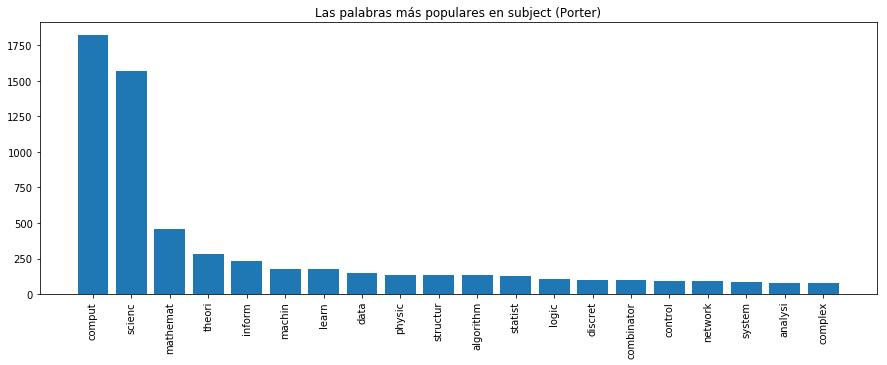

[('algorithm', 955), ('problem', 818), ('use', 751), ('model', 633), ('result', 557), ('show', 550), ('comput', 529), ('graph', 526), ('paper', 490), ('method', 485), ('gener', 466), ('network', 452), ('set', 450), ('time', 445), ('propos', 431), ('data', 426), ('also', 405), ('number', 401), ('system', 358), ('bound', 349)]


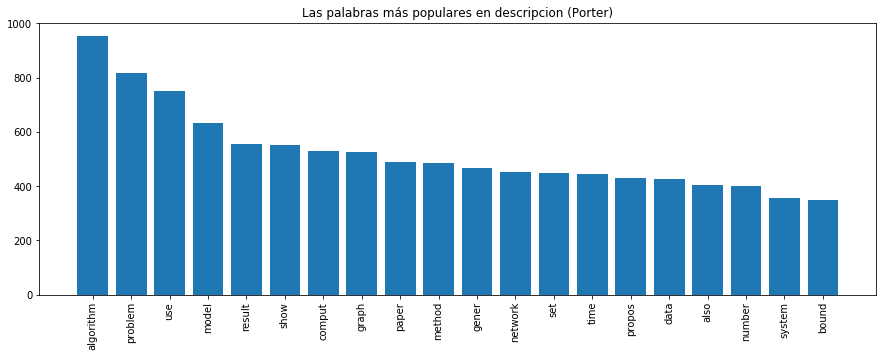

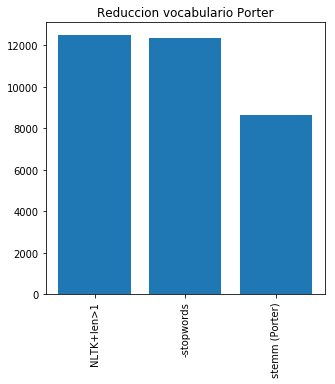

[12479, 12365, 8644]
Numero de tokens despues de usar Lancaster en descripcion es 88708, temas 8582 y en total 97290
[('comput', 1822), ('sci', 1573), ('mathem', 459), ('the', 281), ('inform', 236), ('machin', 174), ('learn', 174), ('dat', 145), ('phys', 137), ('structures', 136), ('algorithm', 136), ('stat', 128), ('log', 105), ('discret', 99), ('combin', 96), ('control', 94), ('network', 91), ('system', 82), ('analys', 80), ('complex', 75)]


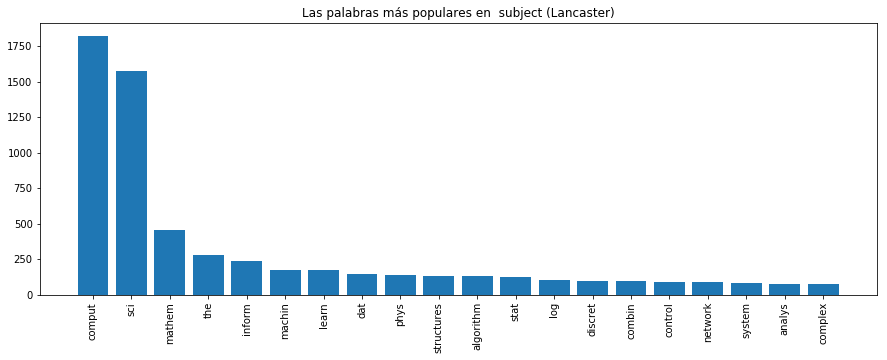

[('us', 962), ('algorithm', 955), ('problem', 821), ('model', 633), ('result', 557), ('show', 550), ('graph', 542), ('comput', 530), ('gen', 495), ('pap', 491), ('method', 485), ('network', 452), ('set', 450), ('tim', 445), ('class', 440), ('dat', 435), ('propos', 431), ('also', 405), ('numb', 401), ('bas', 385)]


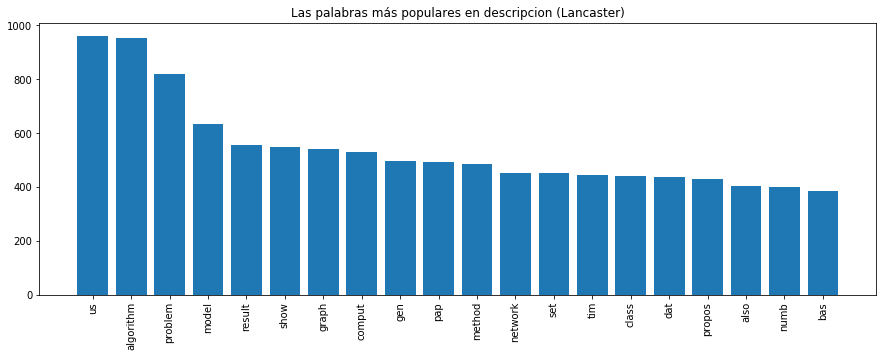

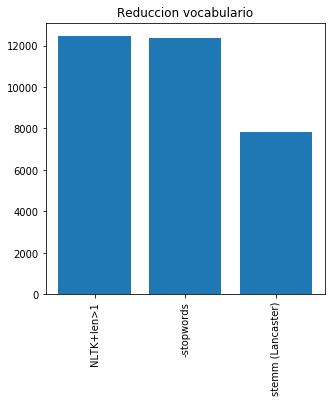

[12479, 12365, 7822]


In [11]:
# Aplique Stemming de NLTK
# 9.1 Utilizando Porter
# 9.2 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs?
# 9.3 imprima el top-20 descendiente de las palabras más frecuentes en el BoW.
# 9.4 Realice la grafica de barras en matplotlib de estas 20 palabras en orden descendentes.
# 9.5 Realice un análisis cualitativo, del resultado de haber aplicado Porter.
# 9.6 Utilizando Lancaster
# 9.7 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs?
# 9.8 imprima el top-20 descendiente de las palabras más frecuentes en el BoW.
# 9.9 Realice la grafica de barras en matplotlib de estas 20 palabras en orden descendentes.
# 9.10 Realice un análisis cualitativo, del resultado de haber aplicado Lancaster.

from nltk.stem import PorterStemmer, LancasterStemmer
### Porter

funcion = punto6
def porter (tokens):
    stemmer=PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

data_red['tokens_description'] =    [porter(funcion(string)) for string in data_red.description] 
data_red['tokens_description_no'] = [len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject'] = [porter(funcion(string)) for string in data_red.subject] 
data_red['tokens_subject_no'] = [len(tokens) for tokens in data_red.tokens_subject]
all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens = []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de usar Porter en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))



fdist = nltk.FreqDist(all_tokens_subject)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en subject (Porter)")
plt.xticks(rotation=90)
plt.show()



fdist = nltk.FreqDist(all_tokens_description)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en descripcion (Porter)")
plt.xticks(rotation=90)
plt.show()

pasos=['NLTK+len>1','-stopwords','stemm (Porter)']
nv=[len(set(tokens_p6_1)),len(set(tokens_p6)),len(set(all_tokens)) ]



plt.figure(figsize=(5,5))
plt.bar(pasos,nv)
plt.title("Reduccion vocabulario Porter")
plt.xticks(rotation=90)
plt.show()
print(nv)


### Lancaster
funcion = punto6
def lancaster (tokens):
    stemmer = LancasterStemmer ()
    return [stemmer.stem(token) for token in tokens]

data_red['tokens_description'] =    [lancaster(funcion(string)) for string in data_red.description] 
data_red['tokens_description_no'] = [len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject'] = [lancaster(funcion(string)) for string in data_red.subject] 
data_red['tokens_subject_no'] = [len(tokens) for tokens in data_red.tokens_subject]
all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens = []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de usar Lancaster en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))



fdist = nltk.FreqDist(all_tokens_subject)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en  subject (Lancaster)")
plt.xticks(rotation=90)
plt.show()



fdist = nltk.FreqDist(all_tokens_description)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en descripcion (Lancaster)")
plt.xticks(rotation=90)
plt.show()


pasos=['NLTK+len>1','-stopwords','stemm (Lancaster)']
tokens_ps=all_tokens.copy()
nv=[len(set(tokens_p6_1)),len(set(tokens_p6)),len(set(tokens_ps)) ]



plt.figure(figsize=(5,5))
plt.bar(pasos,nv)
plt.title("Reduccion vocabulario")
plt.xticks(rotation=90)
plt.show()
print(nv)




Veamos que los resultados no son muy diferentes, es decir, las raices que se hallan son diferentes pero en ambos casos hacen referencia a lo mismo (es evidente por la repetición). Otro punto es que parece que es mucho más agresiva la forma de hacer el stemming con Lancaster, de hecho en algunos casos es dificil reconocer a qué hace referencia, por ejemplo en theory lo reduce a the mientras que usando porter es theori. 

En ambos casos es evidente que el numero de palabras en nuestro diccionario se ve reducido en un factor importante!!! mucho más que eliminar stopwords. Tambien es importante decir que la reducción es un poco mayor usando Lancaster (8644 vs 7822)

Es importante ver que en estos casos no hay reducción del numero de tokens, solo modificación de los mismos. Veamos que aún haciendo el uso del stemming se sigue llegando a la misma conclusión de que el tema principal es computer science.


# Punto 9 (10?)

Numero de tokens despues de hacer lemmatizacion en descripcion es 88708, temas 8582 y en total 97290
[('comput', 1822), ('sci', 1573), ('mathem', 459), ('the', 281), ('inform', 236), ('machin', 174), ('learn', 174), ('dat', 145), ('phys', 137), ('structure', 136), ('algorithm', 136), ('stat', 128), ('log', 105), ('discret', 99), ('combin', 96), ('control', 94), ('network', 91), ('system', 82), ('analys', 80), ('complex', 75)]


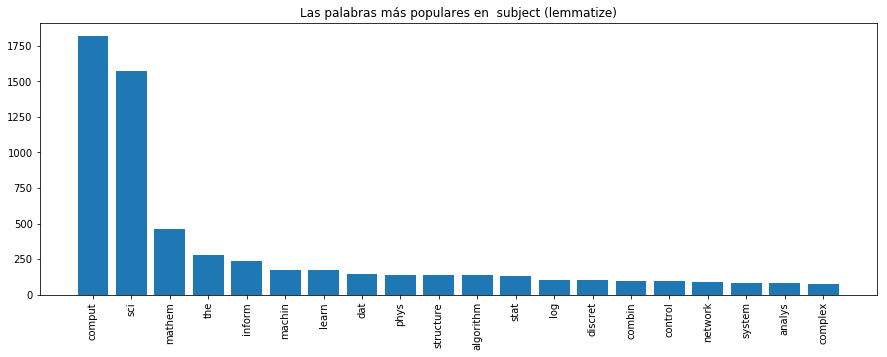

[('algorithm', 955), ('us', 922), ('problem', 821), ('show', 644), ('model', 633), ('result', 557), ('graph', 542), ('comput', 530), ('gen', 495), ('pap', 491), ('method', 485), ('network', 452), ('set', 450), ('tim', 445), ('class', 440), ('dat', 435), ('propos', 431), ('also', 405), ('numb', 401), ('bas', 385)]


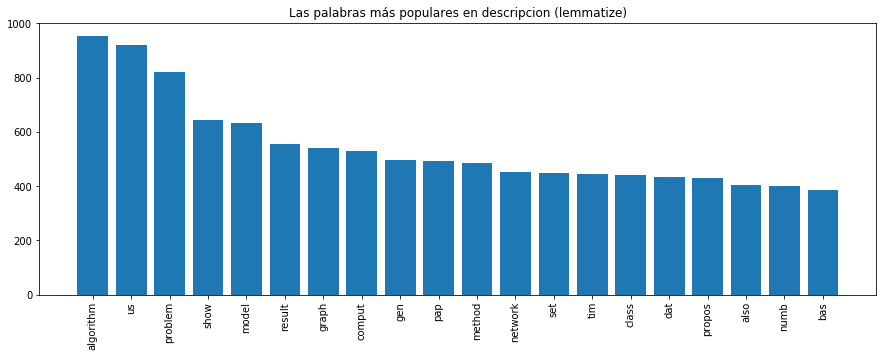

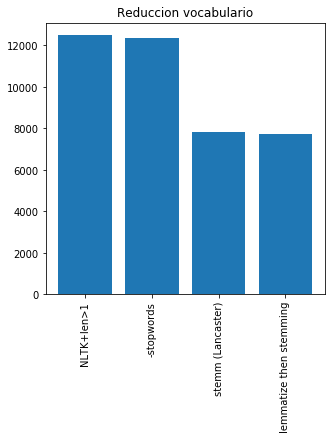

[12479, 12365, 7822, 7710]


In [12]:
# Aplique Lemmatization de NLTK
# 9.1 CUANTOS TOKENS EN TOTAL TIENE EL CONJUNTO DE TOKENs?
# 9.2 imprima el top-20 descendiente de las palabras más frecuentes en el BoW.
# 9.3 Realice la grafica de barras en matplotlib de estas 20 palabras en orden descendentes.
# 9.4 Realice un análisis cualitativo, del resultado de haber aplicado Lemmatization.


from nltk.stem import WordNetLemmatizer
funcion = punto6
def lemma (tokens):
    wnl=WordNetLemmatizer()
    tokens=[wnl.lemmatize(token,pos='v') for token in tokens]
    tokens=[wnl.lemmatize(token,pos='a') for token in tokens]
    tokens=[wnl.lemmatize(token,pos='n') for token in tokens]
    stemmer = LancasterStemmer ()
    tokens =[stemmer.stem(token) for token in tokens]
    return tokens

data_red['tokens_description'] =    [lemma(funcion(string)) for string in data_red.description] 
data_red['tokens_description_no'] = [len(tokens) for tokens in data_red.tokens_description]
data_red['tokens_subject'] = [lemma(funcion(string)) for string in data_red.subject] 
data_red['tokens_subject_no'] = [len(tokens) for tokens in data_red.tokens_subject]
all_tokens_description = [item for sublist in data_red.tokens_description for item in sublist]
all_tokens_subject = [item for sublist in data_red.tokens_subject for item in sublist]
all_tokens = []
all_tokens.extend(all_tokens_subject)
all_tokens.extend(all_tokens_description)

no_description=data_red.tokens_description_no.sum()
no_subject=data_red.tokens_subject_no.sum()
no_total=no_description+no_subject
print('Numero de tokens despues de hacer lemmatizacion en descripcion es {}, temas {} y en total {}'.format(no_description, no_subject,no_total))



fdist = nltk.FreqDist(all_tokens_subject)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en  subject (lemmatize)")
plt.xticks(rotation=90)
plt.show()



fdist = nltk.FreqDist(all_tokens_description)
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title("Las palabras más populares en descripcion (lemmatize)")
plt.xticks(rotation=90)
plt.show()



pasos=['NLTK+len>1','-stopwords','stemm (Lancaster)','lemmatize then stemming']


nv=[len(set(tokens_p6_1)),len(set(tokens_p6)),len(set(tokens_ps)),len(set(all_tokens))  ]




plt.figure(figsize=(5,5))
plt.bar(pasos,nv)
plt.title("Reduccion vocabulario")
plt.xticks(rotation=90)
plt.show()
print(nv)




Para hacer la comparación de los resultados en de este proceso es importante comparar los resultados del punto 8. Lo que vemos es que las palabras unicas son más pocas, en particular vemos que hicimos un mejor palabra con el verbo 'show'. Veamos que la reducción de palabras usando este proceso es muy pequeña (de 7822 a 7710). En general aquí podemos concluir que el paso donde efectivamente se hace una mayor reducción de tokens está en el paso de stemming. 

# Punto 10

In [13]:
# EL PUNTO 10 se colocará en caliente durante el examen presencial